In [3]:
# [1] Configurações iniciais

import fastf1 as ff1
from fastf1.plotting import get_team_color
import matplotlib.pyplot as plt

session = ff1.get_session(2021, 'Brazil', 'R')
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '16', '55', '10', '31', '14', '4', '5', 

In [8]:
# [2] Coletar dados dos pilotos

# Pegar a volta mais rápida de cada piloto
ver_lap = session.laps.pick_drivers('VER').pick_fastest()
ham_lap = session.laps.pick_drivers('HAM').pick_fastest()

# Pegar toda a telemetria de cada piloto
telemetry_ver = ver_lap.get_telemetry()
telemetry_ham = ham_lap.get_telemetry()

redbull_color = ff1.plotting.get_team_color('Red Bull', session)
mercedes_color = ff1.plotting.get_team_color('Mercedes', session)

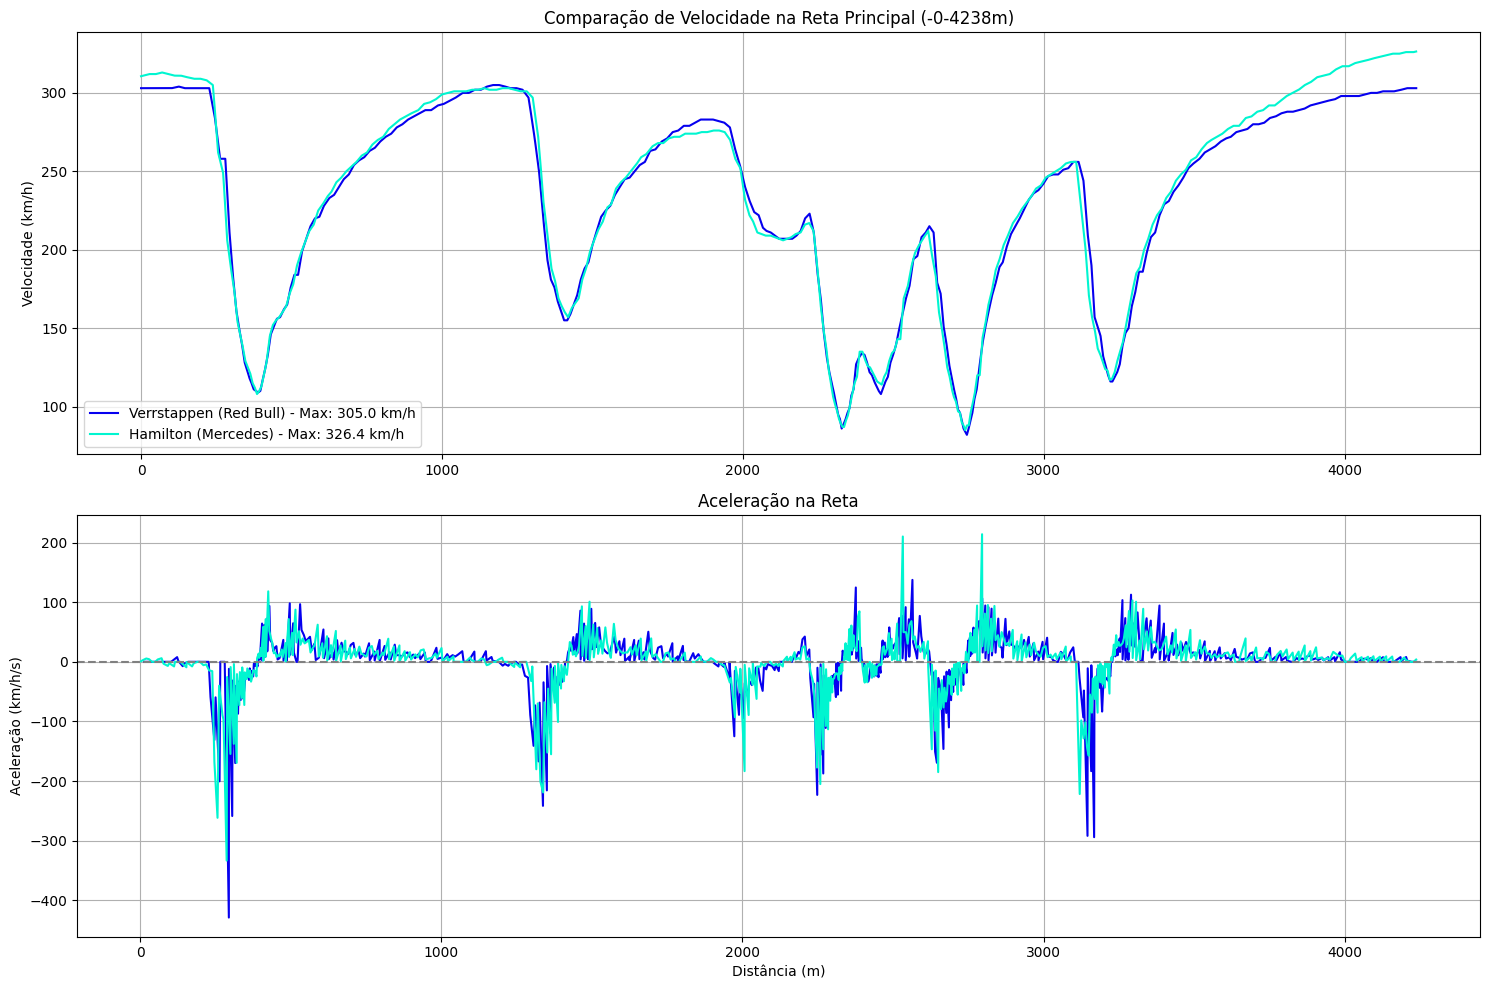

In [10]:
# [3] Plotagem comparativa 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Identificar automaticamente a reta (onde a velocidade é > 300 km/h por mais de 500m)
def find_straight(telemetry):
    high_speed = telemetry[telemetry['Speed'] > 300]
    straight_start = high_speed['Distance'].min()
    straight_end = high_speed['Distance'].max()
    return straight_start, straight_end

ver_start, ver_end = find_straight(telemetry_ver)
ham_start, ham_end = find_straight(telemetry_ham)

# Usar o mesmo intervalo para ambos
straight_start = min(ver_start, ham_start)
straight_end = max(ver_end, ham_end)

# Filtrar
telemetry_ver_straight = telemetry_ver.loc[(telemetry_ver['Distance'] >= straight_start) & 
                                         (telemetry_ver['Distance'] <= straight_end)]
telemetry_ham_straight = telemetry_ham.loc[(telemetry_ham['Distance'] >= straight_start) & 
                                         (telemetry_ham['Distance'] <= straight_end)]

# Gráfico de Velocidade
ax1.plot(telemetry_ver_straight['Distance'], telemetry_ver_straight['Speed'], 
         color=redbull_color, label=f'Verrstappen (Red Bull) - Max: {telemetry_ver_straight["Speed"].max():.1f} km/h')
ax1.plot(telemetry_ham_straight['Distance'], telemetry_ham_straight['Speed'], 
         color=mercedes_color, label=f'Hamilton (Mercedes) - Max: {telemetry_ham_straight["Speed"].max():.1f} km/h')

ax1.set_title(f"Comparação de Velocidade na Reta Principal ({straight_start:.0f}-{straight_end:.0f}m)")
ax1.set_ylabel("Velocidade (km/h)")
ax1.legend()
ax1.grid()

# Gráfico de Aceleração
telemetry_ver_straight['Acceleration'] = telemetry_ver_straight['Speed'].diff() / 0.1
telemetry_ham_straight['Acceleration'] = telemetry_ham_straight['Speed'].diff() / 0.1

ax2.plot(telemetry_ver_straight['Distance'], telemetry_ver_straight['Acceleration'], 
         color=redbull_color, label='Leclerc')
ax2.plot(telemetry_ham_straight['Distance'], telemetry_ham_straight['Acceleration'], 
         color=mercedes_color, label='Hamilton')

ax2.set_title("Aceleração na Reta")
ax2.set_xlabel("Distância (m)")
ax2.set_ylabel("Aceleração (km/h/s)")
ax2.axhline(0, color='gray', linestyle='--') 
ax2.grid()

plt.tight_layout()
plt.savefig('brazil_speed.png', dpi=300, bbox_inches='tight')
plt.show()